# Terror in U.S.A - 10
#### submit: Yido Hasfari, Oran Barel, Nofar Shtesel and  Shani Polak

<div>
  <img src="https://raw.githubusercontent.com/Yido1999/suspect.csv/main/Image_Twins.webp?raw=true" width="750">
</div>

Link to data https://www.kaggle.com/datasets/newamerica/terrorist-activity

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import datetime

# Background:
### Dear readers
### You are about to be exposed to classified information that will profoundly affect the future and security of the American nation.
### The project in front of you includes an in-depth investigation and drawing conclusions of data containing details of the hundreds of terrorists who carried out terrorist attacks in the american nation between the years 2001-2016.
### in the information presented bellow, we tried to decipher what motivated those terrorists to carry out those attacks. What are the tangent lines between the different groups in the data that can indicate one or several trend.
### Please leave cell phones turned off, Make sure there are no strangers near you, And keep the discretion.
# Together we will prevent the next Terror atack. Let's get started..

#### For the purpose of the work we used 2 data. One central data on which the main part of the project was carried out. The second data will be used later in the context of predicting the victims of the attacks

In [115]:
url = "https://raw.githubusercontent.com/Yido1999/suspect.csv/main/suspects.csv"
url2 = "https://raw.githubusercontent.com/Yido1999/plot_df/main/plots_df.csv"
suspect_df = pd.read_csv(url)
Terrorists_plots_df = pd.read_csv(url2)
suspect_df.head()

,suspect_ID,first_name,last_name,full_name,sex,age,marital_status,citizenship_status,last_residency_state,last_residency_country,...,military_target,awlaki_contact,foreign_militant_contact,online_radicalization,overseas_military_training,us_military_experience,suspect_status,date_charged,state_charged,state_charged2
0,1,Zacharias,Moussaoui,Zacharias Moussaoui,Male,33.0,Unmarried,Nonimmigrant Visa,NaN,NaN,...,No,None,Yes,No,Yes,No,Charged,12/11/2001,Virginia,NaN
1,2,Richard,Reid,Richard Reid,Male,28.0,Unmarried,Unknown,NaN,United Kingdom,...,No,None,Yes,No,Yes,No,Charged,12/23/2001,Massachusetts,NaN
2,3,John Walker,Lindh,John Walker Lindh,Male,20.0,Unmarried,US Born Citizen,Virginia,NaN,...,No,None,No,No,Yes,No,Charged,2/5/2002,Virginia,NaN
3,4,Ali,al-Marri,Ali al-Marri,Male,36.0,Married,Nonimmigrant Visa,Illinois,NaN,...,No,None,Yes,No,Yes,No,Charged,2/6/2002,Illinois,NaN
4,5,Imran,Mandhai,Imran Mandhai,Male,19.0,Unmarried,Permanent Resident,Florida,NaN,...,Yes,None,No,No,No,No,Charged,5/16/2002,Florida,NaN


In [116]:
Terrorists_plots_df.head()

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,07/04/2002,4.0,2.0
1,2.0,2002 South Florida Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0
3,4.0,2002 Padilla Plot,Jihadist,Prevented,"Non-NSA Intelligence Provided by CIA, FBI, etc.",NaN,0.0,0.0
4,5.0,2004 Herald Square Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0


In [117]:
Terrorists_plots_df.shape

(216, 8)

In [118]:
suspect_df.shape

(396, 27)

# 1. Wrangling data, missing values and fix columns.

##### We will check how many Nun values we have in the data in each column.

In [119]:
suspect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   suspect_ID                  396 non-null    int64  
 1   first_name                  396 non-null    object 
 2   last_name                   394 non-null    object 
 3   full_name                   396 non-null    object 
 4   sex                         396 non-null    object 
 5   age                         386 non-null    float64
 6   marital_status              396 non-null    object 
 7   citizenship_status          396 non-null    object 
 8   last_residency_state        371 non-null    object 
 9   last_residency_country      24 non-null     object 
 10  plot_ID                     340 non-null    object 
 11  terror_plot                 396 non-null    object 
 12  terror_plot2                6 non-null      object 
 13  informant_use               396 non

In [120]:
suspect_df.isnull().sum().sort_values(ascending=False)

state_charged2                392
terror_plot2                  390
last_residency_country        372
plot_ID                        56
date_charged                   46
state_charged                  40
last_residency_state           25
age                            10
last_name                       2
overseas_military_training      1
foreign_militant_contact        1
military_target                 0
suspect_status                  0
us_military_experience          0
online_radicalization           0
awlaki_contact                  0
suspect_ID                      0
israel/judaism_target           0
family/community_tip            0
public_tip                      0
first_name                      0
terror_plot                     0
citizenship_status              0
marital_status                  0
sex                             0
full_name                       0
informant_use                   0
dtype: int64

#### We will cut all the columns that have more than 300 missing values, and also what is not relevant to us.

In [121]:
suspect_df=suspect_df.drop(columns=suspect_df[['state_charged2','terror_plot2','last_residency_country']])
suspect_df

,suspect_ID,first_name,last_name,full_name,sex,age,marital_status,citizenship_status,last_residency_state,plot_ID,...,israel/judaism_target,military_target,awlaki_contact,foreign_militant_contact,online_radicalization,overseas_military_training,us_military_experience,suspect_status,date_charged,state_charged
0,1,Zacharias,Moussaoui,Zacharias Moussaoui,Male,33.0,Unmarried,Nonimmigrant Visa,NaN,182,...,No,No,None,Yes,No,Yes,No,Charged,12/11/2001,Virginia
1,2,Richard,Reid,Richard Reid,Male,28.0,Unmarried,Unknown,NaN,58,...,No,No,None,Yes,No,Yes,No,Charged,12/23/2001,Massachusetts
2,3,John Walker,Lindh,John Walker Lindh,Male,20.0,Unmarried,US Born Citizen,Virginia,60,...,No,No,None,No,No,Yes,No,Charged,2/5/2002,Virginia
3,4,Ali,al-Marri,Ali al-Marri,Male,36.0,Married,Nonimmigrant Visa,Illinois,169,...,No,No,None,Yes,No,Yes,No,Charged,2/6/2002,Illinois
4,5,Imran,Mandhai,Imran Mandhai,Male,19.0,Unmarried,Permanent Resident,Florida,2,...,Yes,Yes,None,No,No,No,No,Charged,5/16/2002,Florida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,394,Abdul Razak Ali,Artan,Abdul Razak Ali Artan,Male,18.0,Unmarried,Permanent Resident,Ohio,NaN,...,No,No,Ties,No,No,No,No,Deceased,NaN,NaN
392,395,Samy Mohammed,el-Goarany,Samy Mohammed El-Goarany,Male,24.0,Married,US Born Citizen,New York,NaN,...,No,No,Ties,Yes,Yes,Yes,No,Deceased,NaN,NaN
393,396,Saynab Abdirashid,Hussein,Saynab Abdirashid Hussein,Female,24.0,Unmarried,Permanent Resident,Minnesota,NaN,...,No,No,None,Yes,No,No,No,Charged,8/28/2013,Minnesota
394,397,Lionel Nelson,Williams,Lionel Nelson Williams,Male,26.0,Unmarried,US Born Citizen,Virginia,NaN,...,No,No,Ties,No,Yes,No,No,Charged,12/22/2016,Virginia


##### Completion of gaps according to the last missing value that appeared,except  for the age where we filled in according to median

In [122]:
suspect_df[['date_charged','state_charged',"last_residency_state"]]=suspect_df[['date_charged','state_charged',"last_residency_state"]].fillna(method='bfill')
suspect_df[['age']]=suspect_df[['age']].fillna('median')

##### We will want to cut the point blanks in each row.

In [123]:
suspect_df.dropna(subset=['foreign_militant_contact','overseas_military_training','last_name'],inplace=True)

suspect_df.isnull().sum().sort_values()

suspect_ID                     0
suspect_status                 0
us_military_experience         0
overseas_military_training     0
online_radicalization          0
foreign_militant_contact       0
awlaki_contact                 0
military_target                0
israel/judaism_target          0
family/community_tip           0
public_tip                     0
informant_use                  0
terror_plot                    0
last_residency_state           0
citizenship_status             0
marital_status                 0
age                            0
sex                            0
full_name                      0
last_name                      0
first_name                     0
date_charged                   0
state_charged                  0
plot_ID                       55
dtype: int64

##### Note - the "plot_id" column is used by us later in the prediction model when we will want to merge the 2 data. So for now we'll leave it like that. If we encounter a problem later with the missing values, we will remove them.

### we look at the types of columns to see if we want to change them.

In [124]:
suspect_df.dtypes

suspect_ID                     int64
first_name                    object
last_name                     object
full_name                     object
sex                           object
age                           object
marital_status                object
citizenship_status            object
last_residency_state          object
plot_ID                       object
terror_plot                   object
informant_use                 object
public_tip                    object
family/community_tip          object
israel/judaism_target         object
military_target               object
awlaki_contact                object
foreign_militant_contact      object
online_radicalization         object
overseas_military_training    object
us_military_experience        object
suspect_status                object
date_charged                  object
state_charged                 object
dtype: object

##### convert the column 'date_charged' to date time.

In [125]:
suspect_df['date_charged'] = pd.to_datetime(suspect_df['date_charged'])
suspect_df.dtypes

suspect_ID                             int64
first_name                            object
last_name                             object
full_name                             object
sex                                   object
age                                   object
marital_status                        object
citizenship_status                    object
last_residency_state                  object
plot_ID                               object
terror_plot                           object
informant_use                         object
public_tip                            object
family/community_tip                  object
israel/judaism_target                 object
military_target                       object
awlaki_contact                        object
foreign_militant_contact              object
online_radicalization                 object
overseas_military_training            object
us_military_experience                object
suspect_status                        object
date_charg

##### we will convert the column 'age' to numeric type.

In [126]:
suspect_df['age'] = pd.to_numeric(suspect_df['age'], errors='coerce')

# 2. General presentation of the data 

#### Noisy data - outliers

#### After we have finished cleaning the data, we will want to check for outliers where there may be.

## What do we know about the age of the terrorists?

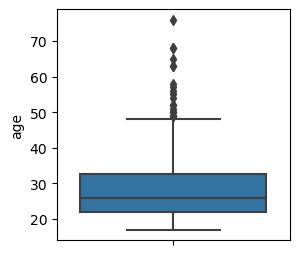

In [127]:
plt.figure(figsize=(3,3))
sns.boxplot( y ='age',data = suspect_df)
plt.show()

##### We see from the boxplot that the median is between 20 and 30 
##### The range between the upper and lower quartile is between 25 and 35
##### Outliers are over 50


### We will present the age distribution

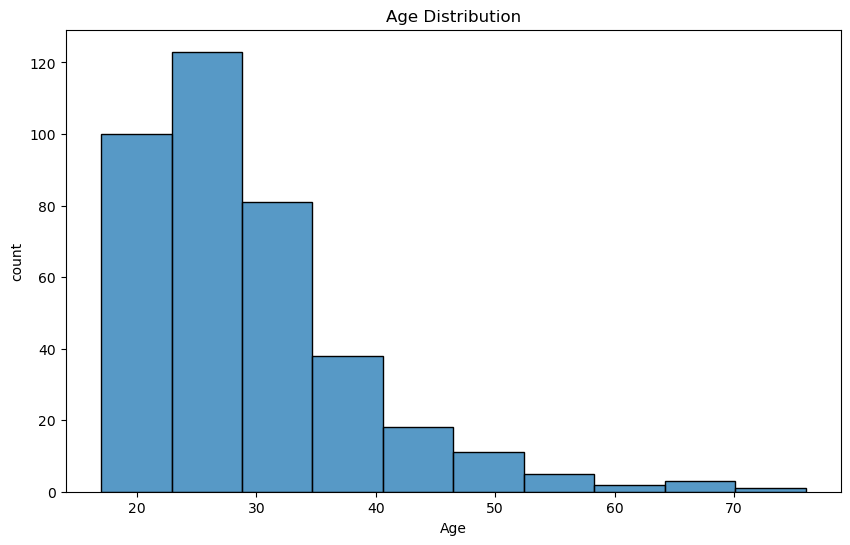

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(suspect_df['age'], bins=10, edgecolor='black',stat="count")
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.show()

### It can be seen from the data that young people between the ages of 20-30 are the majority of terrorists between 2001-2016 in America. This figure is requested because it can be assumed that young people have more to lose.

## What do we know about the gender of the terrorists?

### present the gender distribution

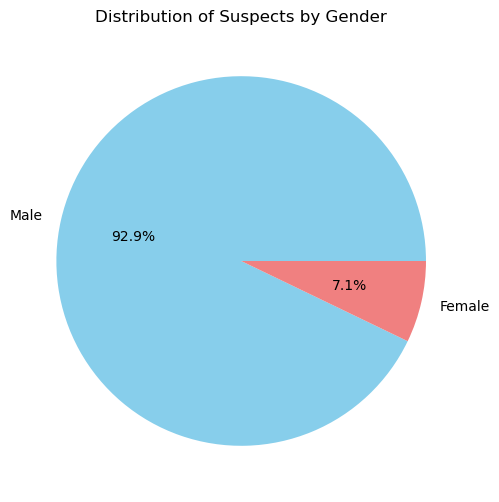

In [129]:
gender_counts = suspect_df['sex'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100
plt.figure(figsize=(6, 6))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Suspects by Gender')
plt.show()

### Terrorism activities are predominantly conducted by males.



### Since the absolute majority of the data consists of men, we will remove the women to stay with data that will give us better accuracy in the prediction we will make later

In [130]:
filtered_df = suspect_df[suspect_df['sex'] == 'Male']


## What do we know about the marital status of the terrorists?

### present the marital status distribution

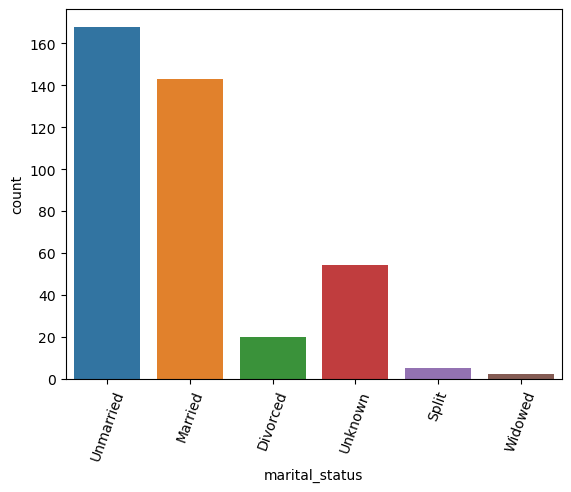

In [131]:
sns.countplot(data = suspect_df, x='marital_status')
plt.xticks(rotation=70)
plt.show()

### Wow, that's an interesting fact. As expected, most of the terrorists are unmarried people, but it can be seen that the gap is relatively small between married and unmarried people. The amount of married terrorists is also very large, contrary to what we would expect, married people have a lot to lose.
### In any case, it can be seen that single people commit more terrorist attacks than married people. Something that may raise speculations about the happiness index. Maybe married people are happier and therefore commit fewer terrorist incidents?


#### We researched further and found an article that reinforces the findings we found regarding the relationship between marital status and level of happiness
https://www.apa.org/news/press/releases/2003/03/married-happy

#### lets combaind the data we have between the age, gender and the marital status

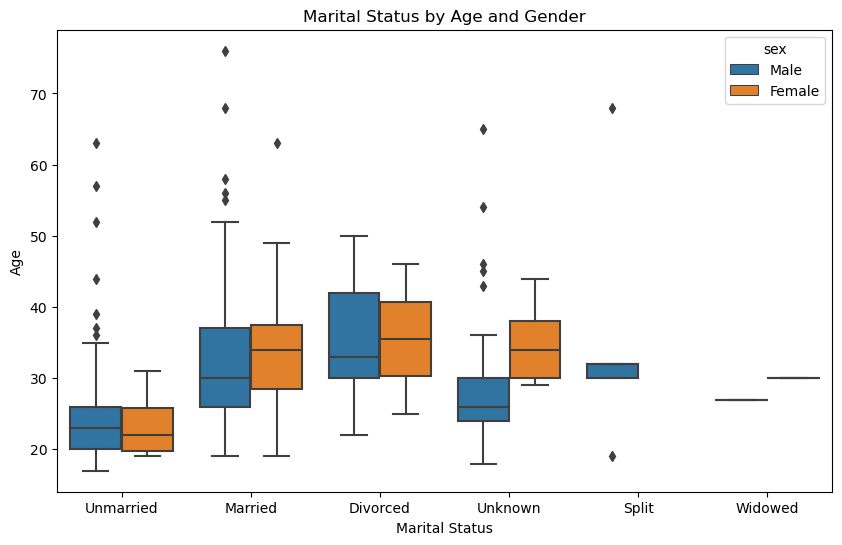

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='marital_status', y='age', hue='sex', data=suspect_df)
plt.xlabel('Marital Status')
plt.ylabel('Age')
plt.title('Marital Status by Age and Gender')
plt.show()

### The distribution seems to follow intuition - younger suspects tend to be single, older tend to be married, with relatively few divorcees, splits, and widows/widowers

# 3 .Conclusion 1 - Segmentation of the number of suspects in each country 

### Number of Suspects Charged by State

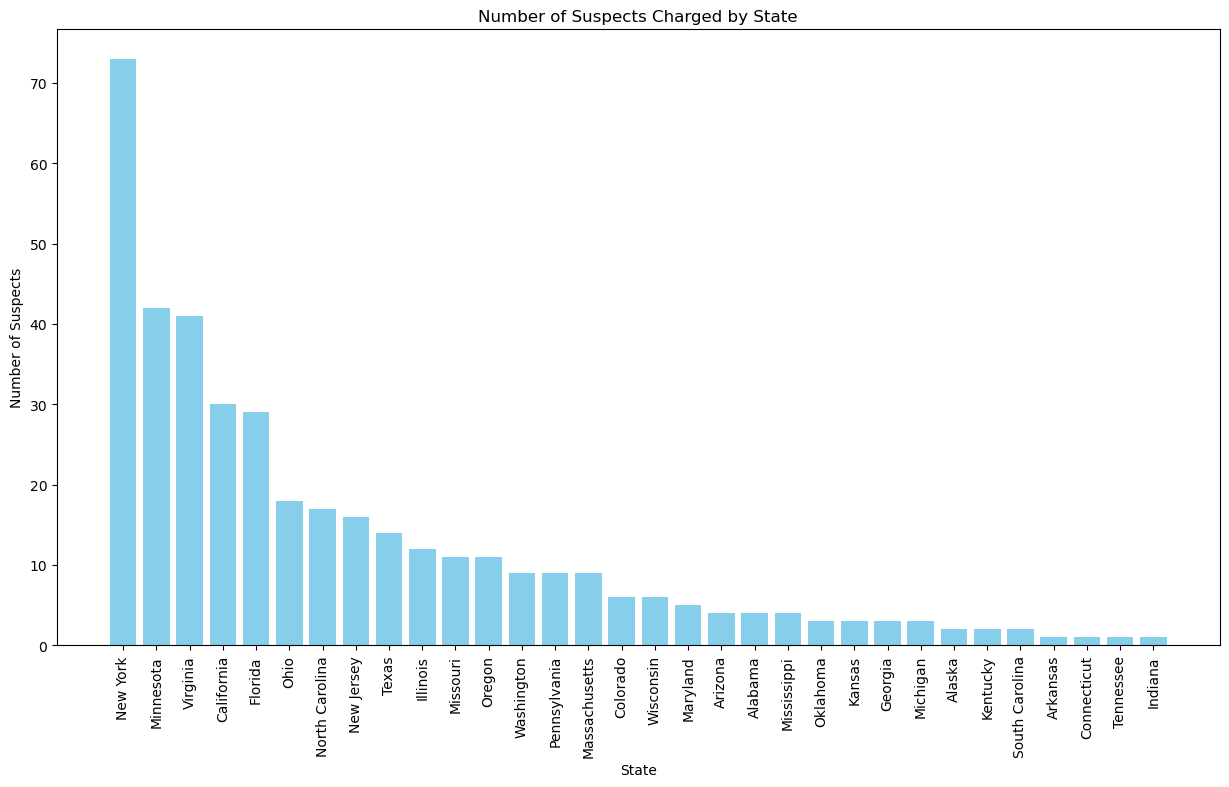

In [133]:
suspects_by_state = suspect_df['state_charged'].value_counts().reset_index()
suspects_by_state.columns = ['State', 'Count']
suspects_by_state.sort_values('Count', ascending=False, inplace=True)
plt.figure(figsize=(15, 8))
plt.bar(suspects_by_state['State'], suspects_by_state['Count'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Suspects')
plt.title('Number of Suspects Charged by State')
plt.xticks(rotation=90)
plt.show()

### We can see that the states of New York, Minnesota and Virginia produced the most terrorists. We will also see this using percentages

In [134]:
state_charged_counts = suspect_df['state_charged'].value_counts()
state_charged_percentages = state_charged_counts / len(suspect_df) * 100
state_charged_table = pd.DataFrame({'State': state_charged_percentages.index, 'Percentage': state_charged_percentages.values})
state_charged_table

,State,Percentage
0,New York,18.622449
1,Minnesota,10.714286
2,Virginia,10.459184
3,California,7.653061
4,Florida,7.397959
5,Ohio,4.591837
6,North Carolina,4.336735
7,New Jersey,4.081633
8,Texas,3.571429
9,Illinois,3.061224


### We will take the three countries from which the most terrorists came out for the purpose of the sample and check if there is a connection between the country where the terrorist lived and the country where he carried out the attack

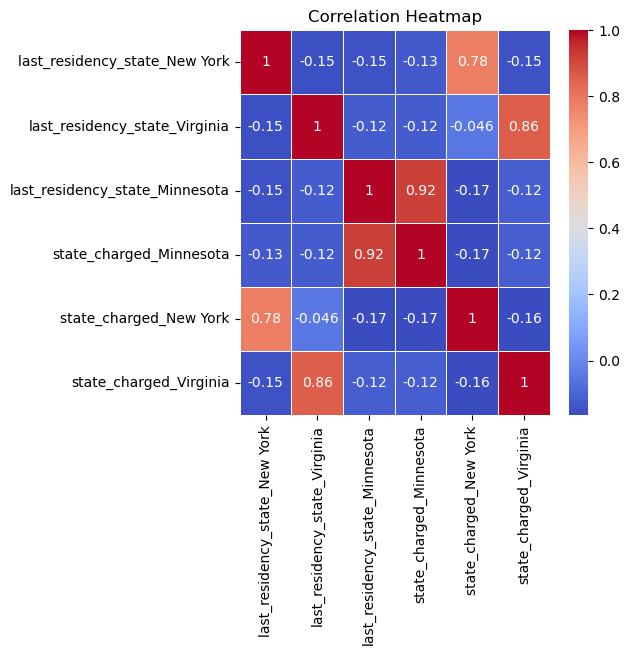

In [135]:
suspects_df=suspect_df.copy()
suspects_df = pd.get_dummies(suspects_df, columns=["last_residency_state","state_charged"])
correlation_matrix = suspects_df[['last_residency_state_New York', 'last_residency_state_Virginia', 'last_residency_state_Minnesota', 'state_charged_Minnesota', 'state_charged_New York', 'state_charged_Virginia']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### It can be clearly seen that there is a connection between the country where the terrorist lived before the action and the country where he was convicted. We can assume that terrorists would prefer to carry out an attack in their country of residence than in a foreign country


### now, we want to explor also the Citizenship status distribution

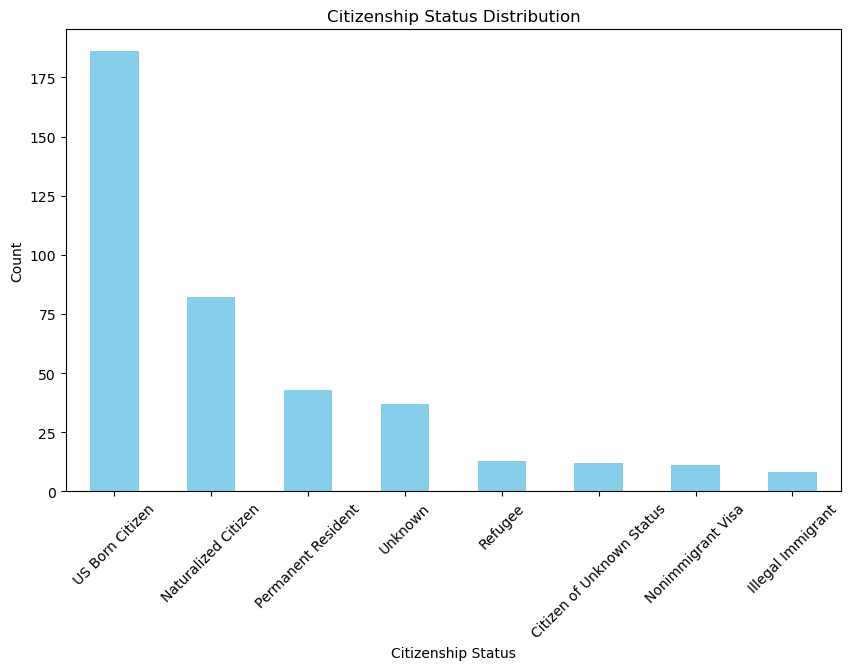

In [136]:
citizenship_status_counts = suspect_df['citizenship_status'].value_counts()
plt.figure(figsize=(10, 6))
citizenship_status_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Citizenship Status')
plt.ylabel('Count')
plt.title('Citizenship Status Distribution')
plt.xticks(rotation=45)
plt.show()

### We will also present the data in percentages

In [137]:
suspect_df['citizenship_status'].value_counts(normalize=True)

US Born Citizen              0.474490
Naturalized Citizen          0.209184
Permanent Resident           0.109694
Unknown                      0.094388
Refugee                      0.033163
Citizen of Unknown Status    0.030612
Nonimmigrant Visa            0.028061
Illegal Immigrant            0.020408
Name: citizenship_status, dtype: float64

### Does illegal immigrant the source of terrorism? No! Illegal Immigrant only counts for 2% of all terrorists. On the contrary, US Born Citizen accounts for 47% of terrorists, followed by Naturalized Citizen (20%), and Permanent Resident (10%), which sum up to 77%: 77% of terrorism activities is linked with Long-term, legal residents.
### It's actually quite natural if we think like terrorists. If I wanted to recruit someone to commit a certain crime, I would want someone who would be least suspected, someone who could move freely, someone who had a job, someone who could marry legally. It helps to hide in plain sight.

# 4 .Conclusion 2 - Segmentation of the number of suspects in each year

### Analyzing our data by year. Let's find the year in which the most terrorists came out

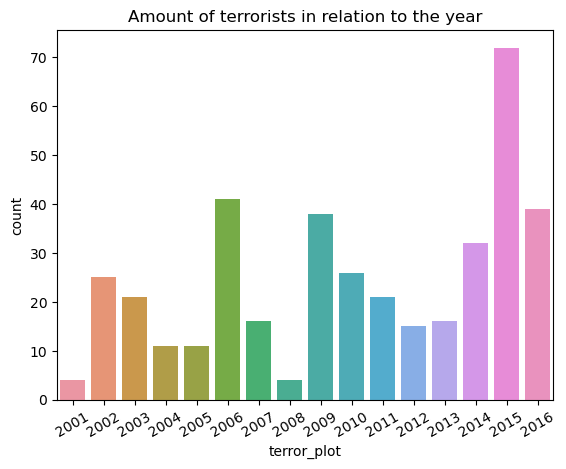

In [138]:
year_df = suspect_df.copy()
year_df['terror_plot'] = year_df['terror_plot'].str.split().str[0]
year_df['terror_plot'] = year_df['terror_plot'].replace('2006\+', '2006', regex=True)
year_df = year_df.sort_values('terror_plot')
sns.countplot(data = year_df, x='terror_plot')
plt.title('Amount of terrorists in relation to the year')
plt.xticks(rotation=30)
plt.show()

### We showed that in 2015 there were the most terrorists, but were there the most terrorist attacks in 2015??

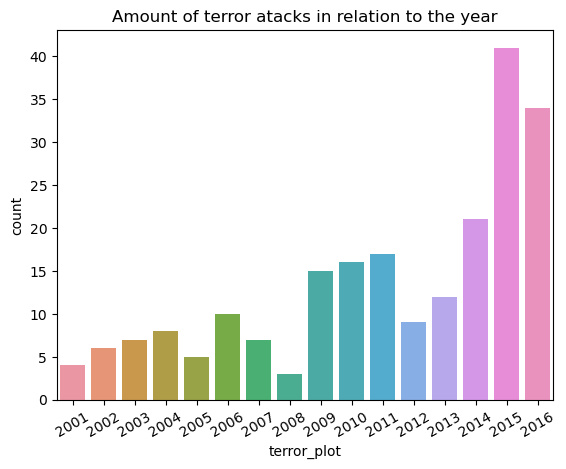

In [139]:
grouped_df = suspect_df.groupby('terror_plot').count().reset_index()
grouped_df['terror_plot'] = grouped_df['terror_plot'].str.split().str[0]
grouped_df['terror_plot'] = grouped_df['terror_plot'].replace('2006\+', '2006', regex=True)
grouped_df = grouped_df.sort_values('terror_plot')
plt.title('Amount of terror atacks in relation to the year')
sns.countplot(data = grouped_df, x='terror_plot')
plt.xticks(rotation=30)
plt.show()

### indeed!! We found that 2015 is also the deadliest year in terms of the number of attacks. This figure may sound trivial, but you can see that in 2006, for example, the data between the two graphs we presented are very different. Can we find a trend line that shows a relationship of increase or decrease in the scope of attacks over the years?

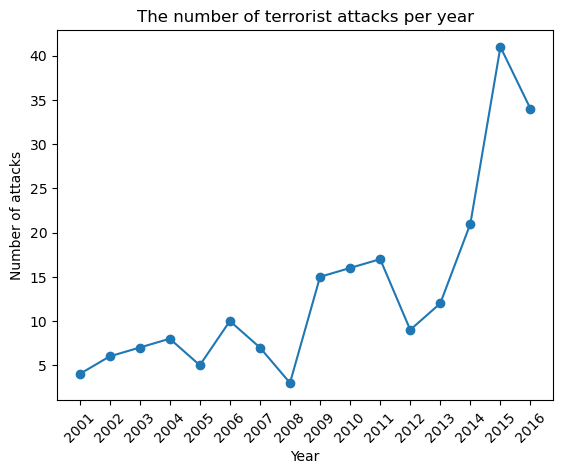

In [140]:
year_counts = grouped_df['terror_plot'].value_counts().sort_index()
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.title('The number of terrorist attacks per year')
plt.xticks(rotation=45)
plt.show()

### In a general way, it can be seen that there is an increase in the scope of terrorism over time, but we also see jumps in values, so we cannot conclude this unequivocally. Let's try to investigate what happened in 2014-2016 that caused a drop in the amount of terrorism. we will check if the "online radicaliztion status is connect to the terror Immigration

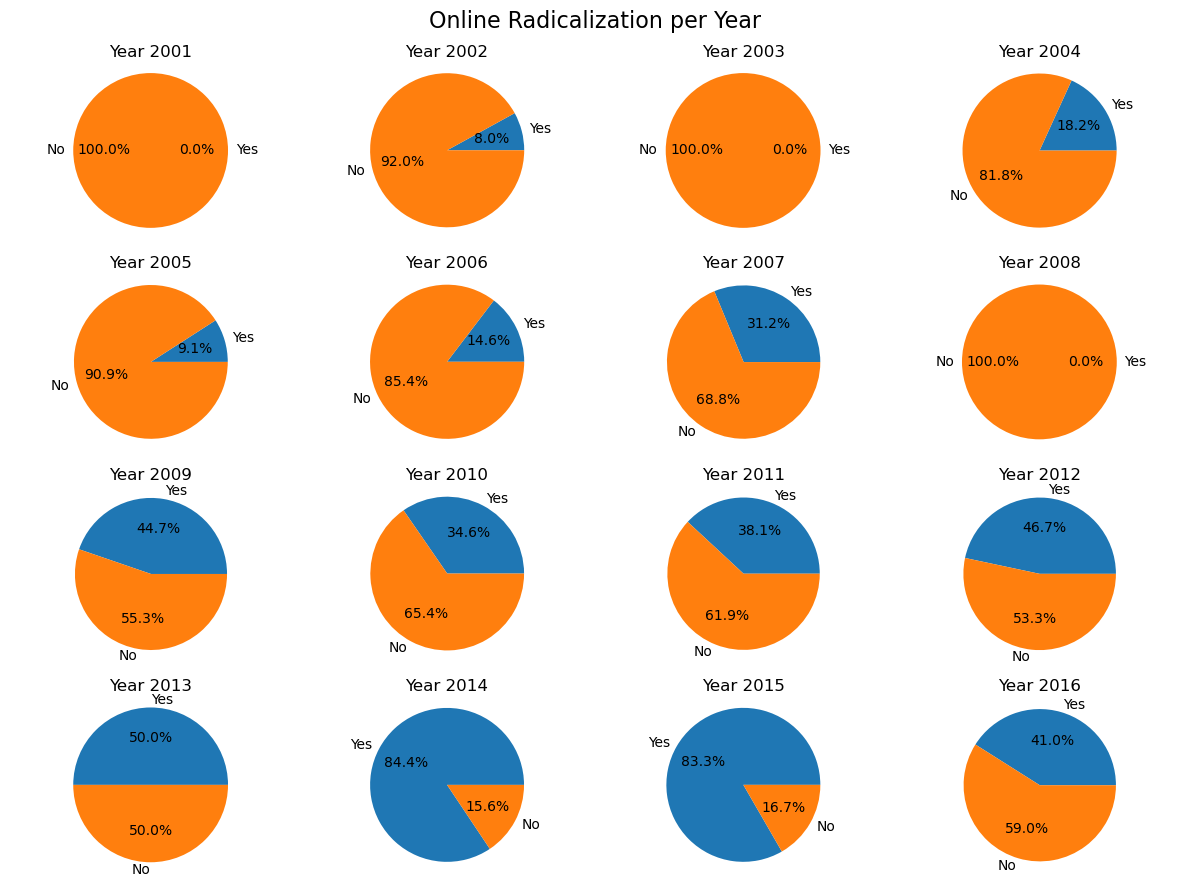

In [141]:
plt.figure(figsize=(12, 9))
for year in range(2001, 2017):
    year_df = suspect_df[suspect_df['terror_plot'].str.startswith(str(year))].copy()    
    contact_count = year_df['online_radicalization'].str.contains('Yes', case=False).sum()
    none_count = year_df['online_radicalization'].str.contains('No', case=False).sum()
    plt.subplot(4, 4, year - 2000)
    plt.pie([contact_count, none_count], labels=['Yes', 'No'], autopct='%1.1f%%')
    plt.title(f"Year {year}")
    plt.axis('equal')
plt.suptitle('Online Radicalization per Year', fontsize=16)
plt.tight_layout()
plt.show()

### It can be seen in general that over the years there has been a clear increase in the percentage of those who are addicted to the Internet. You can also see that in 2015 there is a very high percentage of arsonists, which can indicate the increase in the scope of terrorism. The data is in line with the fact that the Internet and social media have developed over the years, so we expected to see an increase in the percentage of the "online radicalization".
### In addition, we have included an article that explicitly talks about the increase in the percentage of those who are incited by propaganda videos of "Anwar al-Awlaki" (Who carried out Al-Qaeda's leading English-language propaganda) in the years after his death and about the attacks they carried out in 2014, 2015, 2016 that were caused by exposure to terrorist internet propaganda

https://ctc.westpoint.edu/the-enduring-influence-of-anwar-al-awlaki-in-the-age-of-the-islamic-state/

# 5 .Conclusion 3 -Building a decision tree model that will help us decipher the number of victims in the next attack

#### We will subtract outliers from the age column to make the model more accurate

In [159]:
Q1 = suspect_df['age'].describe()['25%']
Q3 = suspect_df['age'].describe()['75%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 
filtered_df = filtered_df[(filtered_df['age'] >= lower_bound) & (filtered_df['age'] <= upper_bound)]


#### We will merge the two files

In [143]:
filtered_df["plot_ID"] =filtered_df["plot_ID"].str.replace(',', '').astype('float64')

In [144]:
filtered_df = filtered_df.merge(Terrorists_plots_df,how='left',left_on = 'plot_ID',right_on='plot_ID')

#### Creating a column of victims made up of the murdered and wounded

In [145]:
filtered_df['victim'] =filtered_df['victims_wounded'] + filtered_df['victims_killed']

#### normalized
 

In [146]:
filtered_df['citizenship_status'].value_counts(normalize=True)

US Born Citizen              0.547558
Naturalized Citizen          0.151671
Permanent Resident           0.110540
Unknown                      0.082262
Citizen of Unknown Status    0.053985
Refugee                      0.029563
Nonimmigrant Visa            0.014139
Illegal Immigrant            0.010283
Name: citizenship_status, dtype: float64

In [147]:
filtered_df['sex'].value_counts(normalize=True)

Male    1.0
Name: sex, dtype: float64

#Transfer factor variables into dummy variables
crit = ['informant_use','public_tip','family/community_tip','israel/judaism_target','military_target',\
       'awlaki_contact','foreign_militant_contact','online_redicalization','overseas_military_training',\
       'us_military_experience','sex','marital_status','citizenship_status']
for column in suspect_df:
    if column in crit:
        data = suspect_df.merge(pd.get_dummies(data=suspect_df[column],prefix=column),right_index=True,left_index=True)
        del suspect_df[column]

In [148]:
suspect_encoder = filtered_df

In [149]:
suspect_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 0 to 777
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   suspect_ID                  778 non-null    int64         
 1   first_name                  778 non-null    object        
 2   last_name                   778 non-null    object        
 3   full_name                   778 non-null    object        
 4   sex                         778 non-null    object        
 5   age                         778 non-null    float64       
 6   marital_status              778 non-null    object        
 7   citizenship_status          778 non-null    object        
 8   last_residency_state        778 non-null    object        
 9   plot_ID                     294 non-null    float64       
 10  terror_plot                 778 non-null    object        
 11  informant_use               778 non-null    object        

#### Drop multiple columns

In [150]:

columns_to_drop = ['suspect_ID', 'first_name', 'last_name', 'full_name'
      , 'last_residency_state',
        'plot_ID', 'terror_plot', 
       'informant_use', 'public_tip', 'family/community_tip',
       'awlaki_contact',
       'foreign_militant_contact', 'online_radicalization',
       'overseas_military_training', 'us_military_experience',
       'suspect_status', 'date_charged', 'state_charged',
       'plot_name', 'plot_ideology', 'plot_status', 'prevention_method',
       'attack_date', 'victims_wounded', 'victims_killed']
suspect_encoder.drop(columns_to_drop, axis=1, inplace=True)

In [151]:
suspect_encoder = suspect_encoder.dropna()

In [152]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
le=LabelEncoder()
alert_le = LabelEncoder()
magtype_le = LabelEncoder()
net_le = LabelEncoder()
suspect_encoder["marital_status"]=alert_le.fit_transform(suspect_encoder["marital_status"])
suspect_encoder["citizenship_status"]=magtype_le.fit_transform(suspect_encoder["citizenship_status"])
suspect_encoder["israel/judaism_target"]=net_le.fit_transform(suspect_encoder["israel/judaism_target"])
suspect_encoder["military_target"]=net_le.fit_transform(suspect_encoder["military_target"])
suspect_encoder["sex"]=net_le.fit_transform(suspect_encoder["sex"]);

In [153]:
suspect_encoder.columns

Index(['sex', 'age', 'marital_status', 'citizenship_status',
       'israel/judaism_target', 'military_target', 'victim'],
      dtype='object')

#### Building the model


In [154]:
features = ['sex', 'age', 'marital_status', 'citizenship_status',
       'israel/judaism_target', 'military_target']
pred_label = ['victim'] 

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()  # Normalize the data
X = suspect_encoder[features] 
y = suspect_encoder[pred_label]
X = sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)  # Setup data for train&test

In [156]:
suspect_encoder = DecisionTreeClassifier()
suspect_encoder.fit(X_train, y_train) 

DecisionTreeClassifier()

In [157]:
y_pred = suspect_encoder.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_pred)*100
ac

91.8103448275862


#### Accuracy in a decision tree model refers to the model's ability to correctly identify the correct class (the expected result) according to the data given to it. When we say that the model has an accuracy of 91, it means that 91% of the data was held correct by the model, and only 9% of the data is erroneous or incorrect. 91% is considered a high accuracy that can reliably predict the number of victims.